<a href="https://colab.research.google.com/github/NeelamRawath/Credit-Card-Fraud-Detection/blob/main/CreditFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

In [ ]:
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27342,34511.0,1.185675,-0.130775,1.054381,1.239780,-0.848668,0.049575,-0.648515,0.187764,1.103580,...,-0.108168,-0.160437,-0.052889,-0.149022,0.441151,-0.373859,0.064122,0.030746,9.99,0
187887,127730.0,2.022845,-1.911508,-0.895401,-1.573085,-1.464985,-0.206640,-1.249990,-0.012654,-1.174523,...,-0.051443,0.050812,0.094535,-0.583835,-0.331483,-0.171333,-0.002004,-0.040127,138.00,0
13884,24646.0,1.100828,0.115819,1.539031,1.643405,-0.753781,0.227847,-0.629308,0.085986,2.116901,...,-0.273328,-0.166427,0.092607,0.374218,0.335810,-0.488461,0.070995,0.030446,1.00,0
83721,59998.0,0.587501,-1.391725,0.767699,0.448146,-1.344526,0.182516,-0.359234,0.138200,1.228542,...,-0.028920,-0.490463,-0.149871,0.165106,-0.060682,0.941169,-0.076702,0.062447,309.00,0
215199,139972.0,2.079879,-0.600272,-1.242544,0.652383,-0.175889,-0.177539,-0.265620,-0.212973,-0.329884,...,-0.275062,-0.060272,-0.028694,-0.790352,0.303370,-0.414868,0.046527,-0.046586,41.98,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94438.563008,0.051481,-0.021139,0.074011,-0.003181,0.001965,-0.052508,0.066304,0.017243,0.033239,...,-0.029196,0.009838,0.034862,-0.038386,-0.022151,-0.027613,0.012025,-0.022891,0.020151,83.568476
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
27342    34511.0  1.185675 -0.130775  1.054381  1.239780 -0.848668  0.049575   
187887  127730.0  2.022845 -1.911508 -0.895401 -1.573085 -1.464985 -0.206640   
13884    24646.0  1.100828  0.115819  1.539031  1.643405 -0.753781  0.227847   
83721    59998.0  0.587501 -1.391725  0.767699  0.448146 -1.344526  0.182516   
215199  139972.0  2.079879 -0.600272 -1.242544  0.652383 -0.175889 -0.177539   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

27342     0
187887    0
13884     0
83721     0
215199    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_train_model(model, X_train, Y_train):
    train_predictions = model.predict(X_train)
    print(f"Model: {model.__class__.__name__} - Training Data")
    print("Accuracy:", accuracy_score(Y_train, train_predictions))
    print("Precision:", precision_score(Y_train, train_predictions))
    print("Recall:", recall_score(Y_train, train_predictions))
    print("F1 Score:", f1_score(Y_train, train_predictions))
    print("ROC AUC:", roc_auc_score(Y_train, train_predictions))
    print("\n")

In [ ]:
def evaluate_test_model(model, X_test, Y_test, predictions):
    print(f"Model: {model.__class__.__name__} - Test Data")
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Precision:", precision_score(Y_test, predictions))
    print("Recall:", recall_score(Y_test, predictions))
    print("F1 Score:", f1_score(Y_test, predictions))
    print("ROC AUC:", roc_auc_score(Y_test, predictions))
    print("\n")

In [ ]:
# List of models to evaluate
models = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True),  # SVC with probability=True for ROC AUC
    KNeighborsClassifier()
]

In [ ]:
# Define and train models
trained_models = {}
predictions = {}

for model in models:
    model.fit(X_train, Y_train)  # Train the model
    trained_models[model.__class__.__name__] = model

    # Make predictions on test data
    test_predictions = model.predict(X_test)
    predictions[model.__class__.__name__] = test_predictions

# Evaluate models on training data
for name, model in trained_models.items():
    evaluate_train_model(model, X_train, Y_train)

# Evaluate models on test data
for name, test_predictions in predictions.items():
    evaluate_test_model(trained_models[name], X_test, Y_test, test_predictions)

Model: LogisticRegression - Training Data
Accuracy: 0.9390088945362135
Precision: 0.9650537634408602
Recall: 0.9111675126903553
F1 Score: 0.9373368146214099
ROC AUC: 0.9390443161416152


Model: RandomForestClassifier - Training Data
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


Model: GradientBoostingClassifier - Training Data
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC: 1.0


Model: SVC - Training Data
Accuracy: 0.5044472681067345
Precision: 0.504950495049505
Recall: 0.5177664974619289
F1 Score: 0.5112781954887219
ROC AUC: 0.504430322522313


Model: KNeighborsClassifier - Training Data
Accuracy: 0.7662007623888183
Precision: 0.7573529411764706
Recall: 0.7842639593908629
F1 Score: 0.7705735660847879
ROC AUC: 0.7661777812221491


Model: LogisticRegression - Test Data
Accuracy: 0.934010152284264
Precision: 0.967032967032967
Recall: 0.8979591836734694
F1 Score: 0.9312169312169313
ROC AUC: 0.9338280766852196


Model: RandomForestClassifier - Test 

In [ ]:
def evaluate_test_model_metrics(model, X_test, Y_test, predictions):
    metrics = {
        'Model': model.__class__.__name__,
        'Accuracy': accuracy_score(Y_test, predictions),
        'Precision': precision_score(Y_test, predictions),
        'Recall': recall_score(Y_test, predictions),
        'F1 Score': f1_score(Y_test, predictions),
        'ROC AUC': roc_auc_score(Y_test, predictions)
    }
    return metrics

In [ ]:
# Collect metrics for each model
metrics_list = []
for name, test_predictions in predictions.items():
    model = trained_models[name]
    metrics = evaluate_test_model_metrics(model, X_test, Y_test, test_predictions)
    metrics_list.append(metrics)

# Create a DataFrame from the metrics list
metrics_df = pd.DataFrame(metrics_list)
print(metrics_df)


                        Model  Accuracy  Precision    Recall  F1 Score  \
0          LogisticRegression  0.934010   0.967033  0.897959  0.931217   
1      RandomForestClassifier  0.918782   0.955556  0.877551  0.914894   
2  GradientBoostingClassifier  0.928934   0.966667  0.887755  0.925532   
3                         SVC  0.624365   0.625000  0.612245  0.618557   
4        KNeighborsClassifier  0.624365   0.611111  0.673469  0.640777   

    ROC AUC  
0  0.933828  
1  0.918573  
2  0.928726  
3  0.624304  
4  0.624613  


Best Model by Accuracy: LogisticRegression


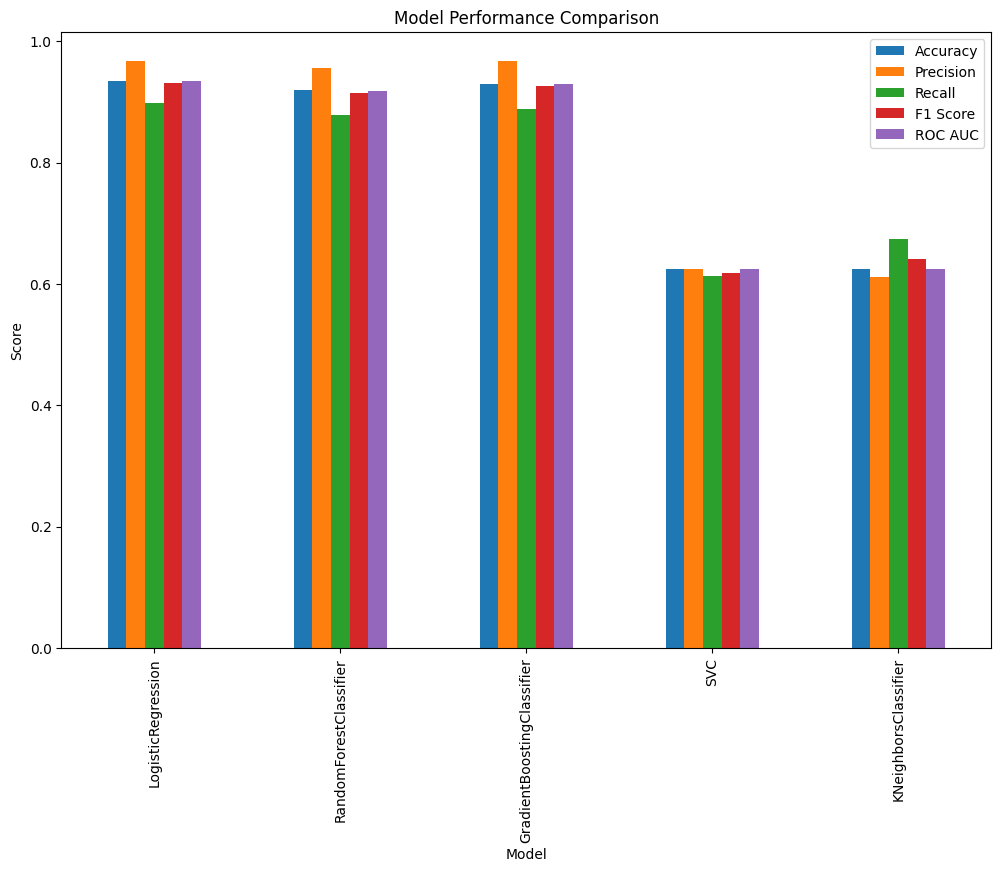

In [ ]:
# Sort models by Accuracy
best_model = metrics_df.sort_values(by='Accuracy', ascending=False).iloc[0]
print(f"Best Model by Accuracy: {best_model['Model']}")

# Plot performance metrics
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


In [ ]:
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVC', 'KNN'],
    'Accuracy': [0.93, 0.91, 0.92, 0.62, 0.62],
    'Precision': [0.96, 0.95, 0.96, 0.62, 0.61],
    'Recall': [0.89, 0.87, 0.88, 0.61, 0.67],
    'F1 Score': [0.93, 0.91, 0.92, 0.61, 0.64],
    'ROC AUC': [0.93, 0.91, 0.92, 0.62, 0.62]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(data)

# Determine the best model for each metric
best_models = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']:
    best_models[metric] = metrics_df.loc[metrics_df[metric].idxmax(), 'Model']

# Print the best models for each metric
for metric, model in best_models.items():
    print(f"The best model for {metric} is: {model}")

The best model for Accuracy is: Logistic Regression
The best model for Precision is: Logistic Regression
The best model for Recall is: Logistic Regression
The best model for F1 Score is: Logistic Regression
The best model for ROC AUC is: Logistic Regression
